In [ ]:
# Importation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model  # For visualizing your model architecture
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reserve part of the data for validation
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Creation of Data Split and Augmentation of Training Set
batch_size = 32
img_size = 224
target_size = (img_size, img_size)

train_generator = train_datagen.flow_from_directory(
    r'.\data\processed',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',  # Or 'categorical' if multi-class
    color_mode='grayscale',
    subset='training',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    r'.\data\processed',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',
    subset='validation',
    shuffle=False
)

Found 456 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [ ]:
# Model Definition
def DMSA_Net():
  model = Sequential()
  model.add(Conv2D(input_shape=(img_size,img_size,1),filters=64,kernel_size=(3,3),padding='same', activation='relu'))
  model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten(name='flatten'))
  model.add(Dense(128, activation='relu', name='fc1'))
  model.add(Dense(64, activation='relu', name='fc2'))
  model.add(Dense(32, activation='relu', name='fc3'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid', name='output'))

  return model


model=DMSA_Net()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
# Check model summary
print(model.summary())

c:\Users\ghass\Desktop\DMSA-Net\DMSA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc3 (Dense)                     │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 998,625 (3.81 MB)

 Trainable params: 998,625 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Training & Validation
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs = 200, 
                    shuffle = 'True')

c:\Users\ghass\Desktop\DMSA-Net\DMSA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6063 - loss: 0.6897 - val_accuracy: 0.6161 - val_loss: 0.6689
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 806ms/step - accuracy: 0.6215 - loss: 0.6720 - val_accuracy: 0.6161 - val_loss: 0.6691
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 790ms/step - accuracy: 0.5939 - loss: 0.6787 - val_accuracy: 0.6161 - val_loss: 0.6653
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 792ms/step - accuracy: 0.6711 - loss: 0.6478 - val_accuracy: 0.6161 - val_loss: 0.6779
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 802ms/step - accuracy: 0.6086 - loss: 0.6819 - val_accuracy: 0.6161 - val_loss: 0.6746
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 806ms/step - accuracy: 0.6277 - loss: 0.6795 - val_accuracy: 0.6161 - val_loss: 0.6772
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 784ms/step - accuracy: 0.6448 - loss: 0.6742 - val_accuracy: 0.6161 - val_loss: 0.6705
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 791ms/step - accuracy: 0.6407 - loss: 0.6658 - val

In [ ]:
# Saving Model
model.save(r'C:\Users\ghass\Desktop\DMSA-Net\models\dmsa_model_91_96.h5')

In [ ]:
# Model Evaluation
preds = model.evaluate(val_generator)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9199 - loss: 0.6761
Loss = 0.5654471516609192
Test Accuracy = 0.9196428656578064


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step


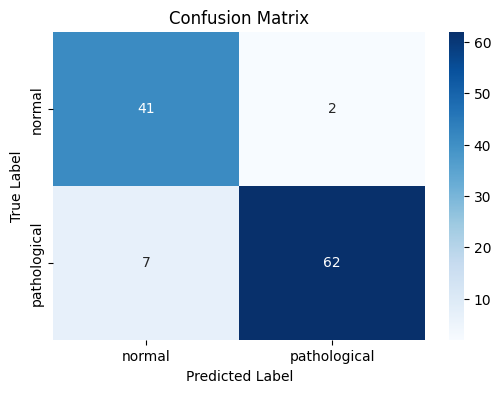

Classification Report:

              precision    recall  f1-score   support

      normal       0.85      0.95      0.90        43
pathological       0.97      0.90      0.93        69

    accuracy                           0.92       112
   macro avg       0.91      0.93      0.92       112
weighted avg       0.92      0.92      0.92       112



In [ ]:
# Get predictions on validation/test set
y_pred_prob = model.predict(val_generator, verbose=1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Extract true labels from generator
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(val_generator.class_indices.keys())

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
